# Overview

This a notebook that inspects the results of a WarpX simulation.

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [2]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
from numpy import fft

## Read data in the simulation frame - 3D diag file

### Set up target field and diag file

In [3]:
np.seterr(divide = 'ignore') 
field = 'Ey'
diag_name = 'plt_Bernado_TE10_20201221_' # E.g., diagnostics.diags_names = diag

### Initialize space and time indices

In [7]:
k0 = 1; k1 = 3072; dk = 1 # starting z index k0; ending z index k1; interval dk
tn0 = 10; tn1 = 200000; dnt = 10 # starting t index t0; ending t index t1; interval dt
dt = 2.4251758e-14;

### Initialize data file

In [8]:
for k in range(k0, k1, dk):
    filename = 'Ey_Bernado_k%d.dat' %k
    f = open(filename, 'w') # writing mode
    np.savetxt(f, [])

### Save data using numpy & color plot

In [5]:
 for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    sl = yt.SlicePlot(ds, 1, field, origin='native', aspect=2./1) # Create a sliceplot object
    sl.set_zlim('Ey', -1e-2, 1e-2)
    sl.set_log('Ey', False)
    sl._setup_plots()
    sl.set_font({'family': 'sans-serif', 'size': 20})
    #sl.show() # Show the plot
    sl.save(str(iteration).zfill(5)+'.png')
    
    for k in range(k0, k1, dk):
        data = np.column_stack((dt * iteration, Ey_array[255,1,k]))
        filename = 'Ey_Bernado_k%d.dat' %k
        f = open(filename, 'a') # writing mode
        np.savetxt(f, data)
        f.close()
        
ds.field_list # Print all available quantities

KeyboardInterrupt: 

### Save data using numpy only

In [9]:
 for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    #ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    ad0 = ds.covering_grid(level=0, left_edge=[ 0., 0., -0.25], dims=[ 2, 2, 3072]) # zline in the center only
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    for k in range(k0, k1, dk):
        data = np.column_stack((dt * iteration, Ey_array[0,0,k]))
        filename = 'Ey_Bernado_k%d.dat' %k
        f = open(filename, 'a') # writing mode
        np.savetxt(f, data)
        f.close()
        # plot
        if k == k1+dk: # don't want to plot...
                sl = yt.SlicePlot(ds, 1, field, origin='native', aspect=2./1) # Create a sliceplot object
                sl.set_zlim('Ey', -1e-2, 1e-2)
                sl.set_log('Ey', False)
                sl._setup_plots()
                sl.set_font({'family': 'sans-serif', 'size': 20})
                sl.show() # Show the plot
                sl.save(str(iteration).zfill(5)+'.png')
        # print(k, iteration)
        
ds.field_list # Print all available quantities

KeyboardInterrupt: 

### Line plot of time field

Text(0.5, 0, 'time in second')

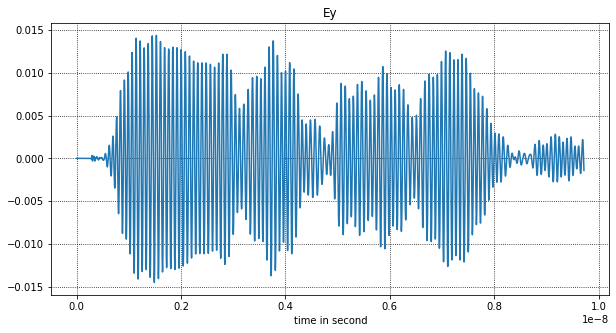

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

data = np.loadtxt('Ey_Bernado_k600.dat')
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y)
plt.grid(True, color='k', linestyle=':')
plt.title("Ey")
plt.xlabel("time in second")

### Color plot only

In [9]:
tn0 = 10; tn1 = 100000; dnt = 20 # starting t index t0; ending t index t1; interval dt

for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    sl = yt.SlicePlot(ds, 1, field, origin='native', aspect=2./1) # Create a sliceplot object
    sl.set_zlim('Ey', -1e-2, 1e-2)
    sl.set_log('Ey', False)
    sl._setup_plots()
    sl.set_font({'family': 'sans-serif', 'size': 20})
    #sl.show() # Show the plot
    sl.save(str(iteration).zfill(5)+'.png')
    # print(k, iteration)
        
ds.field_list # Print all available quantities

/global/homes/j/jackiezy/.conda/envs/MyCondaEnv/lib/python3.7/site-packages/yt/visualization/base_plot_types.py:219: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  vmax=float(np.nanmax(data)))
/global/homes/j/jackiezy/.conda/envs/MyCondaEnv/lib/python3.7/site-packages/yt/visualization/base_plot_types.py:219: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  vmax=float(np.nanmax(data)))
/global/homes/j/jackiezy/.conda/envs/MyCondaEnv/lib/python3.7/site-packages/yt/visualization/base_plot_types.py:219: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  vmax=float(np.nanmax(data)))
/global/homes/j/jackiezy/.conda/envs/MyCondaEnv/lib/python3.7/site-packages/yt/visualization/base_plot_types.py:219: MatplotlibDeprecationWarning: default base 

KeyboardInterrupt: 

### Line plot of space field

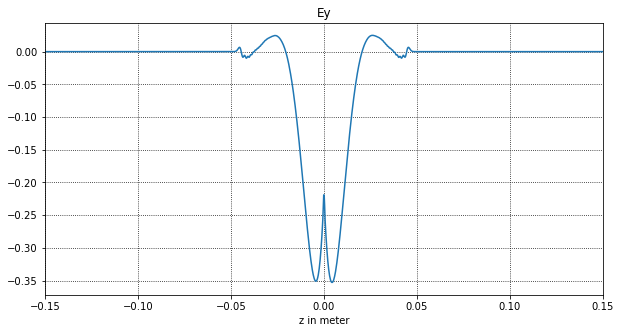

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
iteration = 2000
while iteration < 70000 :
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    plt.plot(z_array[205,4,:], Ey_array[205,4,:])
    plt.xlim(-0.15, 0.15)
    #plt.legend()
    plt.grid(True, color='k', linestyle=':')
    plt.title("Ey")
    plt.xlabel("z in meter")
    
    iteration = iteration + 70000
    

## Read data in the simulation frame - 1D line file

### Set up target field and line file

In [82]:
np.seterr(divide = 'ignore') 
field = 'Ey'
diag_name = 'zline_Bernado_TE10_20201203_' # E.g., diagnostics.diags_names = diag

### Initialize data file

In [83]:
k0 = 10; k1 = 2038; dk = 1000 # starting z index k0; ending z index k1; interval dk
tn0 = 10; tn1 = 125000; dnt = 20 # starting t index t0; ending t index t1; interval dt

for k in range(k0, k1, dk):
    filename = 'Ey_Bernado_k%d.dat' %k
    f = open(filename, 'w') # writing mode
    np.savetxt(f, [])

### Save data file using numpy

In [62]:
for iteration in range (tn0, tn1, dnt) : # time step
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    for k in range(k0, k1, dk):
        data = np.column_stack((7.734696453e-14 * iteration, Ey_array[1,1,k]))
        filename = 'Ey_Bernado_k%d.dat' %k
        f = open(filename, 'a') # writing mode
        np.savetxt(f, data)
        f.close()
        
ds.field_list # Print all available quantities

KeyboardInterrupt: 

### Test line plot of space field

(2, 2, 2048)
[ 0.    0.   -0.25] code_length [5.83984375e-05 2.54000000e-03 2.50000000e-01] code_length
[   2    2 2048]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] kg*m/(A*s**3)
[[[-0.24987793 -0.24963379 -0.24938965 ...  0.24938965  0.24963379
    0.24987793]
  [-0.24987793 -0.24963379 -0.24938965 ...  0.24938965  0.24963379
    0.24987793]]

 [[-0.24987793 -0.24963379 -0.24938965 ...  0.24938965  0.24963379
    0.24987793]
  [-0.24987793 -0.24963379 -0.24938965 ...  0.24938965  0.24963379
    0.24987793]]] m


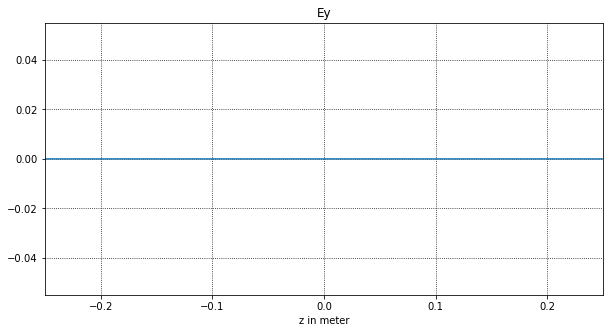

In [90]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5
iteration = 99900
while iteration < 125000 :
    plotfile = './diags/{}{:05d}'.format(diag_name, iteration)
    ds = yt.load( plotfile ) # Load the plotfile
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    #ado = ds.all_data()
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    Hx_array = ad0['Hx'].to_ndarray()
    plt.plot(z_array[1,1,:], Ey_array[1,1,:])
    plt.xlim(-0.25, 0.25)
    #plt.legend()
    plt.grid(True, color='k', linestyle=':')
    plt.title("Ey")
    plt.xlabel("z in meter")
    
    iteration = iteration + 70000
    
print(Ey_array.shape)
print(ds.domain_left_edge, ds.domain_right_edge)
print(ds.domain_dimensions)
print(ad0['Ey'])
print(ad0['z'])


### fft in time domain

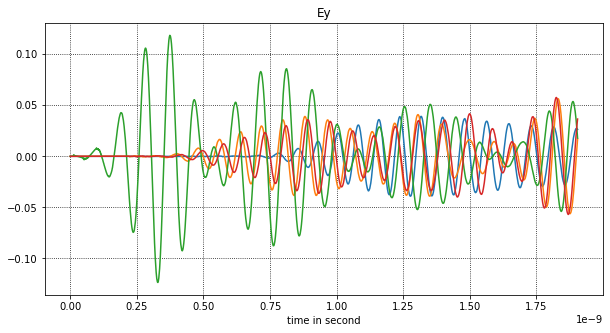

In [18]:
k0 = 50;
k1 = 1988;
dk = 500;

for k in range (k0, k1, dk):
    data = np.loadtxt('./raw_data/Ey_Bernado_k%d.dat' %k) 
    nt = data[:, 0]
    Ey = data[:, 1]
    plt.plot(nt, Ey)
    plt.grid(True, color='k', linestyle=':')
    plt.title("Ey")
    plt.xlabel("time in second")

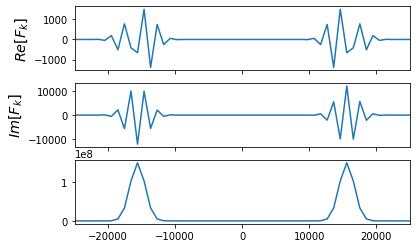

In [10]:
Fk = fft.fft(Ey_array[1,1,:])/nz    # Fourier coefficients (divided by n)
nu = fft.fftfreq(nz,dz)  # Natural frequencies

Fk= fft.fftshift(Fk)   # Shift zero freq to center
nu = fft.fftshift(nu)   # Shift zero freq to center

f, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(nu, np.real(Fk))         # Plot Cosine terms
ax[0].set_ylabel(r'$Re[F_k]$', size = 'x-large')
ax[1].plot(nu, np.imag(Fk))         # Plot Sine terms
ax[1].set_ylabel(r'$Im[F_k]$', size = 'x-large')
ax[2].plot(nu, np.absolute(Fk)**2)  # Plot spectral power
# ax[2].set_ylabel(r'$\vertF_k\vert^2$', size = 'x-large')
# ax[2].set_xlabel(r'$\widetilde{\nu}$', size = 'x-large')
plt.xlim((-25000,25000))
plt.show()